In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3013,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
3014,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
3015,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
3016,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

In [6]:
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3013    134.4154
3014    134.5559
3015    134.6849
3016    134.7783
3017    134.8692
Name: Close, Length: 3018, dtype: float64

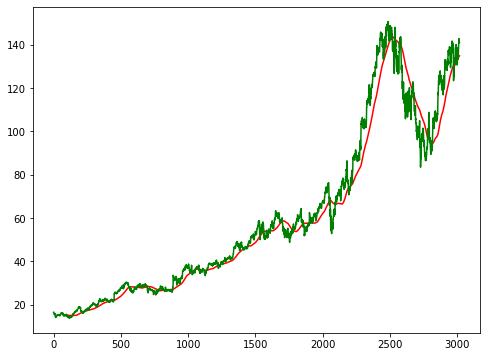

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

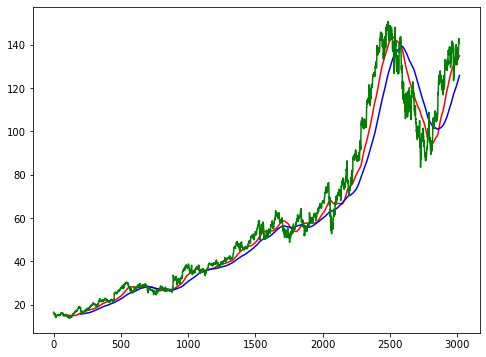

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2414

In [14]:
data_test.shape[0]

604

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose = True)

Epoch 1/50
73/73 [==============================] - 31s 374ms/step - loss: 0.0163
Epoch 2/50
73/73 [==============================] - 24s 333ms/step - loss: 0.0041
Epoch 3/50
73/73 [==============================] - 24s 329ms/step - loss: 0.0034
Epoch 4/50
73/73 [==============================] - 22s 300ms/step - loss: 0.0035
Epoch 5/50
73/73 [==============================] - 14s 187ms/step - loss: 0.0028
Epoch 6/50
73/73 [==============================] - 14s 193ms/step - loss: 0.0033
Epoch 7/50
73/73 [==============================] - 15s 210ms/step - loss: 0.0028
Epoch 8/50
73/73 [==============================] - 14s 196ms/step - loss: 0.0028
Epoch 9/50
73/73 [==============================] - 16s 211ms/step - loss: 0.0025
Epoch 10/50
73/73 [==============================] - 16s 224ms/step - loss: 0.0022
Epoch 11/50
73/73 [==============================] - 16s 225ms/step - loss: 0.0029
Epoch 12/50
73/73 [==============================] - 18s 254ms/step - loss: 0.0023
Epoch 13/50
7

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

In [29]:
scale =1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

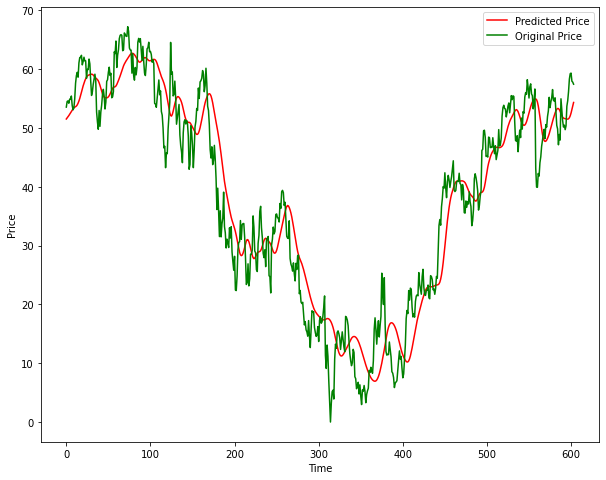

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')